In [4]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [5]:
im_file = "img.jpg"
img = cv2.imread(im_file)

In [6]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

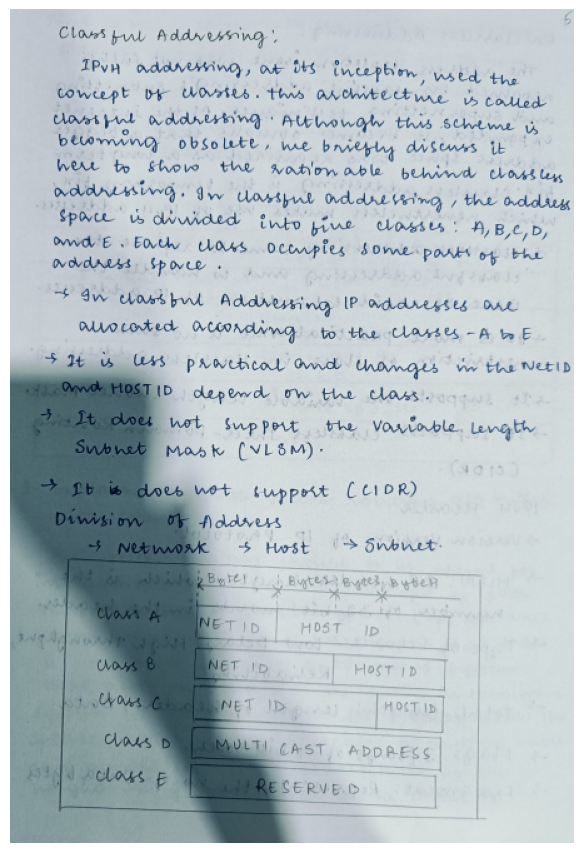

In [7]:
display(im_file)

In [11]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("inverted.jpg", inverted_image)

True

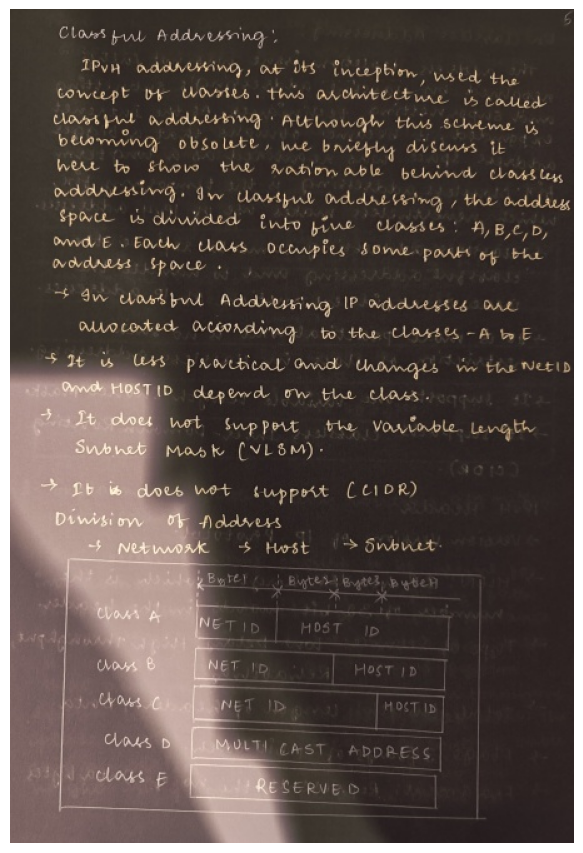

In [13]:
display("inverted.jpg")

Binarization

In [14]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [15]:
gray_image = grayscale(img)
cv2.imwrite("gray.jpg", gray_image)

True

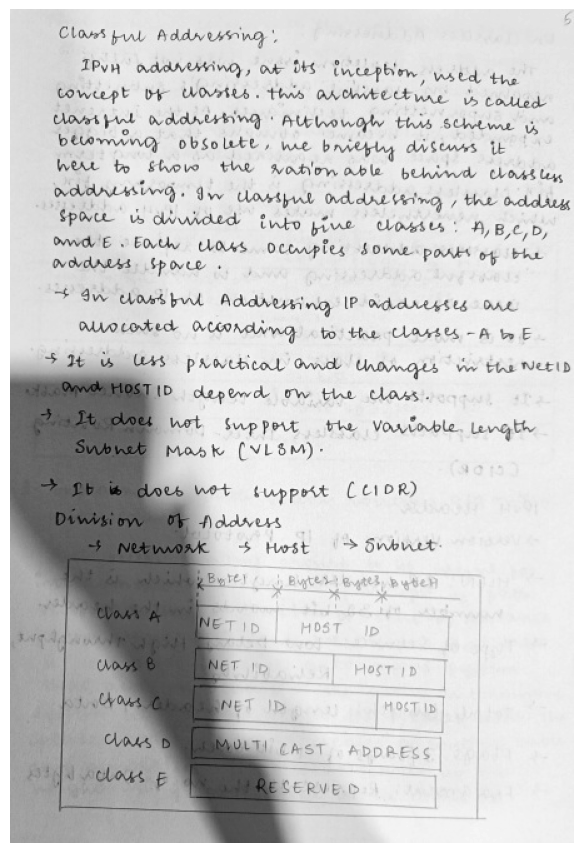

In [16]:
display("gray.jpg")

In [34]:
im_bw = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2.imwrite("bw_image.jpg", im_bw)


True

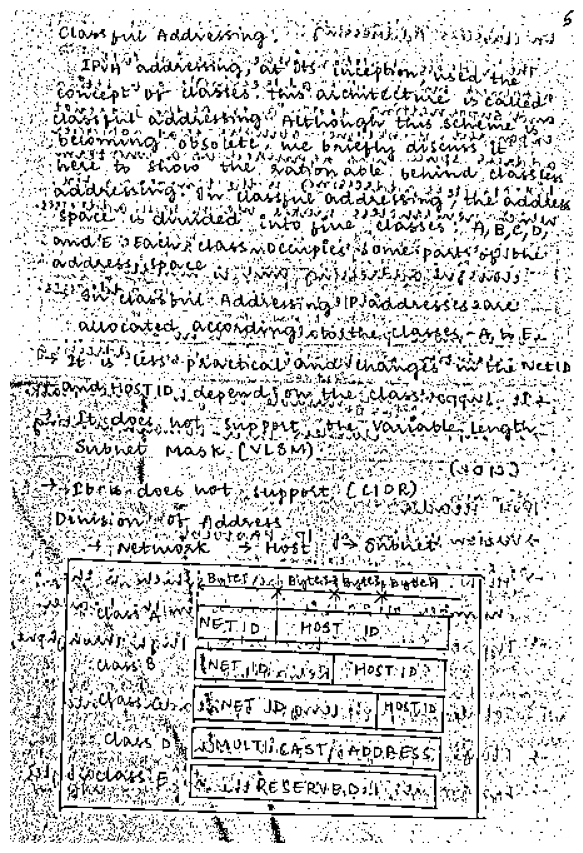

In [35]:
display("bw_image.jpg")

In [36]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [44]:
import numpy as np

In [45]:
kernel = np.ones((1,1), np.uint8)
no_noise = cv2.morphologyEx(im_bw, cv2.MORPH_OPEN, kernel)
cv2.imwrite("no_noise.jpg", no_noise)



True

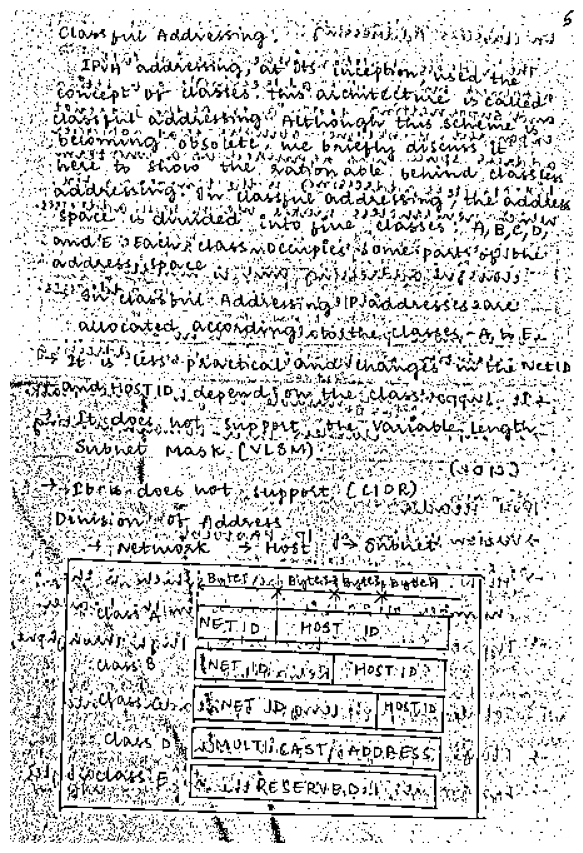

In [46]:
display("no_noise.jpg")

In [47]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [48]:
eroded_image = thin_font(no_noise)
cv2.imwrite("eroded_image.jpg", eroded_image)

True

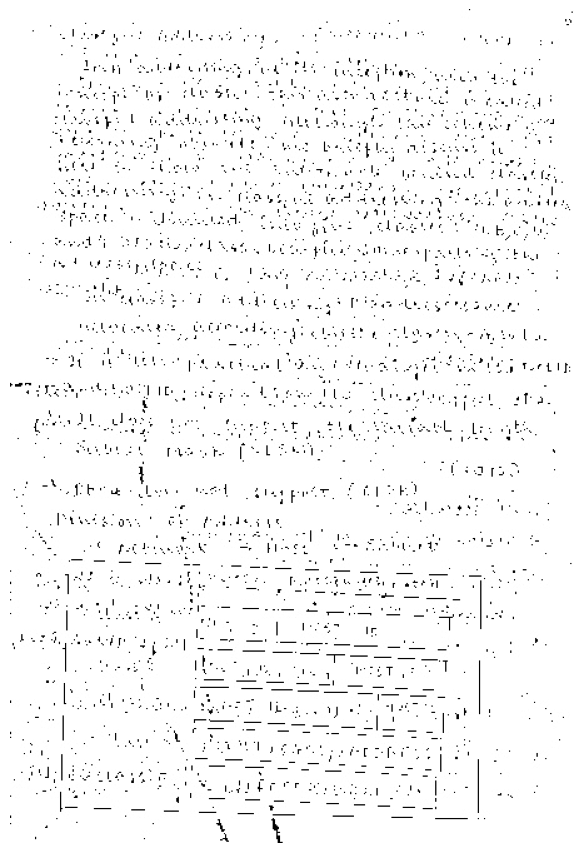

In [49]:
display("eroded_image.jpg")